In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)
!pip install lime
import lime
from lime import lime_tabular
import statistics as sts
from scipy import stats
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import missingno as msno
from sklearn.metrics import roc_curve

from sklearn.feature_selection import SelectKBest, chi2, f_classif
import xgboost as xgb
import time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=1632e9976cd63271c8fa7ab7ebb99fad99271a445959082866eb3387ef2a7dc0
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Thesis/kidney_disease.csv", index_col=0)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.wc.unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

##Error correction

In [5]:
# converting sg into float
df.sg[df.sg==1.02] = 3
df.sg[df.sg==1.01] = 1
df.sg[df.sg==1.005] = 0
df.sg[df.sg==1.015] = 2
df.sg[df.sg==1.025] = 4
df['sg'] = df['sg'].astype(float)

# converting wc into float
df.wc[df.wc=="\t?"] = np.nan
df.wc[df.wc=="\t6200"] = 6200
df.wc[df.wc == "\t8400"] = 8400
df['wc'] = df['wc'].astype(float)

#converting pcv into float
df.pcv[df.pcv == "\t?"] = np.nan
df.pcv[df.pcv == "\t43"] = 43
df['pcv'] = df['pcv'].astype(float)

#converting rbc into float
df.rbc[df.rbc == "abnormal"] = 1
df.rbc[df.rbc == "normal"] = 0
df['pcv'] = df['pcv'].astype(float)

#converting pc into float
df.pc[df.pc == "abnormal"] = 1
df.pc[df.pc == "normal"] = 0
df['pc'] = df['pc'].astype(float)

#converting pcc into float
df.pcc[df.pcc == "notpresent"] = 0
df.pcc[df.pcc == "present"] = 1
df['pcc'] = df['pcc'].astype(float)

#converting ba into float
df.ba[df.ba == "notpresent"] = 0
df.ba[df.ba == "present"] = 1
df['ba'] = df['ba'].astype(float)

#converting bgr into float
df['bgr'] = df['bgr'].astype(float)

#converting bu into float
df['bu'] = df['bu'].astype(float)

#converting sc into float
df['sc'] = df['sc'].astype(float)

#converting sod into float
df['sod'] = df['sod'].astype(float)

#converting rc into float
df.rc[df.rc=="\t?"] = np.nan
df['rc'] = df['rc'].astype(float)

#converting pot into float
df['pot'] = df['pot'].astype(float)

#converting hemo into float
df['hemo'] = df['hemo'].astype(float)

#converting htn into float
df.htn[df.htn == "yes"] = 1
df.htn[df.htn == "no"] = 0
df['htn'] = df['htn'].astype(float)

#converting dm into float
df.dm[df.dm == "yes"] = 1
df.dm[df.dm == " yes"] = 1
df.dm[df.dm == "\tyes"] = 1
df.dm[df.dm == "no"] = 0
df.dm[df.dm == "\tno"] = 0
df['dm'] = df['dm'].astype(float)

#converting cad into float
df.cad[df.cad == "yes"] = 1
df.cad[df.cad == "no"] = 0
df.cad[df.cad == "\tno"] = 0
df['cad'] = df['cad'].astype(float)

#converting appet into float
df.appet[df.appet == "good"] = 0
df.appet[df.appet == "poor"] = 1
df['appet'] = df['appet'].astype(float)

#converting pe into float
df.pe[df.pe == "no"] = 0
df.pe[df.pe == "yes"] = 1
df['pe'] = df['pe'].astype(float)

#converting ane into float
df.ane[df.ane == "no"] = 0
df.ane[df.ane == "yes"] = 1
df['ane'] = df['ane'].astype(float)

#converting age,bp, al, su into float if any non float type is present
df['age'] = df['age'].astype(float)
df['bp'] = df['bp'].astype(float)
df['al'] = df['al'].astype(float)
df['su'] = df['su'].astype(float)

#converting classification into right form of string
df.classification[df.classification == "ckd\t"] = 1
df.classification[df.classification == "ckd"] = 1
df.classification[df.classification == "notckd"] = 0
df['classification'] = df['classification'].astype(float)

<ipython-input-5-fc66ef5015d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sg[df.sg==1.02] = 3
<ipython-input-5-fc66ef5015d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sg[df.sg==1.01] = 1
<ipython-input-5-fc66ef5015d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sg[df.sg==1.005] = 0
<ipython-input-5-fc66ef5015d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

In [6]:
# df_knn_imputed = df.copy(deep=True)
# knn_imp = KNNImputer()
# df_knn_imputed.loc[:, :] = knn_imp.fit_transform(df_knn_imputed)
# df_knn_imputed

In [7]:
df_cat_featuers = df.drop(['age', 'bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','classification'], axis=1)
df_num_featuers = df[['age', 'bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
df_num_featuers.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
id,,,,,,,,,,,
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


##KNN Imputation

In [8]:
# knn imputation only for continuous columns
df_num_featuers = df_num_featuers.copy(deep=True)
knn_imp = KNNImputer()
df_num_featuers.loc[:, :] = knn_imp.fit_transform(df_num_featuers)
df_num_featuers

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
id,,,,,,,,,,,
0,48.0,80.0,121.0,36.0,1.2,138.8,4.30,15.4,44.0,7800.0,5.20
1,7.0,50.0,113.0,18.0,0.8,137.4,4.00,11.3,38.0,6000.0,4.96
2,62.0,80.0,423.0,53.0,1.8,133.8,4.20,9.6,31.0,7500.0,3.80
3,48.0,70.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,3.90
4,51.0,80.0,106.0,26.0,1.4,138.4,3.98,11.6,35.0,7300.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.90,15.7,47.0,6700.0,4.90
396,42.0,70.0,75.0,31.0,1.2,141.0,3.50,16.5,54.0,7800.0,6.20
397,12.0,80.0,100.0,26.0,0.6,137.0,4.40,15.8,49.0,6600.0,5.40


##Mode Imputation

In [9]:
#imputation for categorical features using mode
df_cat_featuers.sg.fillna(3.0, inplace=True)
df_cat_featuers.al.fillna(0.0, inplace=True)
df_cat_featuers.su.fillna(0.0, inplace=True)
df_cat_featuers.rbc.fillna(0.0, inplace=True)
df_cat_featuers.pc.fillna(0.0, inplace=True)
df_cat_featuers.pcc.fillna(0.0, inplace=True)
df_cat_featuers.ba.fillna(0.0, inplace=True)
df_cat_featuers.htn.fillna(0.0, inplace=True)
df_cat_featuers.dm.fillna(0.0, inplace=True)
df_cat_featuers.cad.fillna(0.0, inplace=True)
df_cat_featuers.appet.fillna(0.0, inplace=True)
df_cat_featuers.pe.fillna(0.0, inplace=True)
df_cat_featuers.ane.fillna(0.0, inplace=True)

In [10]:
# #scaling with MinMaxScaler (normalization)
# from sklearn.preprocessing import MinMaxScaler
# MMS = MinMaxScaler()
# columns = df_num_featuers.columns.to_list()
# df_num_featuers = pd.DataFrame(MMS.fit_transform(df_num_featuers), columns=columns)
# df_num_featuers.head()

In [11]:
df_num_featuers

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
id,,,,,,,,,,,
0,48.0,80.0,121.0,36.0,1.2,138.8,4.30,15.4,44.0,7800.0,5.20
1,7.0,50.0,113.0,18.0,0.8,137.4,4.00,11.3,38.0,6000.0,4.96
2,62.0,80.0,423.0,53.0,1.8,133.8,4.20,9.6,31.0,7500.0,3.80
3,48.0,70.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,3.90
4,51.0,80.0,106.0,26.0,1.4,138.4,3.98,11.6,35.0,7300.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,140.0,49.0,0.5,150.0,4.90,15.7,47.0,6700.0,4.90
396,42.0,70.0,75.0,31.0,1.2,141.0,3.50,16.5,54.0,7800.0,6.20
397,12.0,80.0,100.0,26.0,0.6,137.0,4.40,15.8,49.0,6600.0,5.40


In [12]:
#scaling with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = df_num_featuers.columns.to_list()
df_num_featuers_scaled = pd.DataFrame(scaler.fit_transform(df_num_featuers), columns=columns)
df_num_featuers_scaled.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,-0.203389,0.274543,-0.365435,-0.438173,-0.333460,0.134207,-0.095670,1.029280,0.602511,-0.250497,0.564886
1,-2.616277,-1.930625,-0.470103,-0.801400,-0.404567,-0.016739,-0.201911,-0.456652,-0.114124,-0.944767,0.298927
2,0.620524,0.274543,3.585778,-0.095125,-0.226800,-0.404886,-0.131084,-1.072771,-0.950198,-0.366208,-0.986542
3,-0.203389,-0.460513,-0.417769,-0.034587,0.128735,-2.863153,-0.733117,-0.492895,-0.830759,-0.674773,-0.875726
4,-0.026836,0.274543,-0.561687,-0.639965,-0.297907,0.091080,-0.208994,-0.347926,-0.472442,-0.443349,-0.100012


In [13]:
# # #scaling with RobustScaler
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# columns = df_num_featuers.columns.to_list()
# df_num_featuers_scaled = pd.DataFrame(scaler.fit_transform(df_num_featuers), columns=columns)
# df_num_featuers_scaled.head()

In [14]:
df = pd.concat([df_num_featuers_scaled, df_cat_featuers, df.classification], axis=1)

In [15]:
X = df.drop('classification', axis=1)
y = df.classification

In [16]:
X.shape

(400, 24)

In [17]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

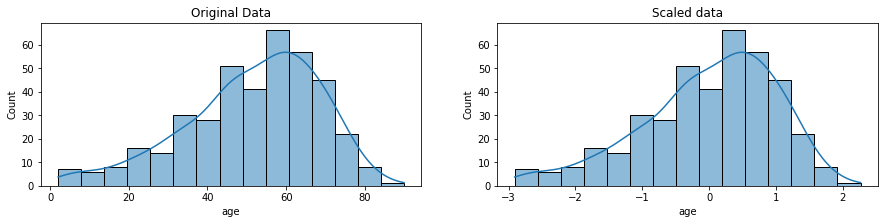

In [18]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df_num_featuers.age, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(df_num_featuers_scaled.age, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

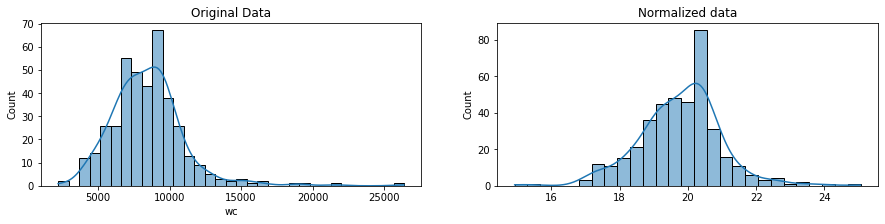

In [19]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(df_num_featuers.wc)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df_num_featuers.wc, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

##RF

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 50))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
print(CV_rf.score(X_test, y_test))

RandomForestClassifier(random_state=3)
1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)
y_predicted = rf.predict(X_test)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

1.0
1.0


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



##KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Minimum error:- 0.022727272727272728 at K = 0


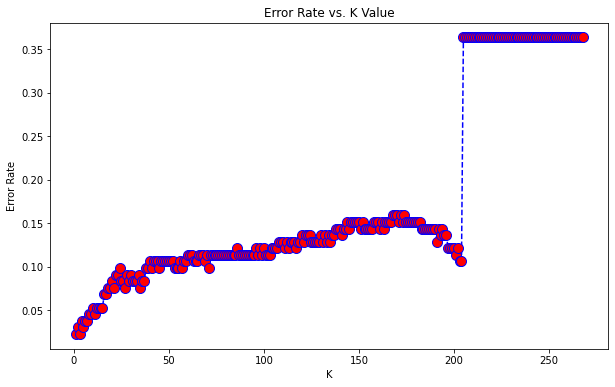

In [ ]:
error_rate = []
for i in range(1,269):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,269),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [ ]:
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
print(CV_neigh.score(X_train, y_train))
print(CV_neigh.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=1)
1.0
0.9772727272727273


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
y_predicted = neigh.predict(X_test)
print(neigh.score(X_train, y_train))
print(neigh.score(X_test, y_test))

1.0
0.9772727272727273


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        48
         1.0       1.00      0.96      0.98        84

    accuracy                           0.98       132
   macro avg       0.97      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132



##DT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
param_grid = {
              'random_state':list(range(51))
             }
dcsn_tree = DecisionTreeClassifier()
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
print(CV_dcsn_tree.score(X_train, y_train))
print(CV_dcsn_tree.score(X_test, y_test))

DecisionTreeClassifier(random_state=34)
1.0
1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dcsn_tree = DecisionTreeClassifier(random_state=34)
dcsn_tree.fit(X_train, y_train)
y_predicted = dcsn_tree.predict(X_test)
print(dcsn_tree.score(X_train, y_train))
print(dcsn_tree.score(X_test, y_test))

1.0
1.0


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



##SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
param_grid = {
              'random_state':list(range(0,51)), 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
svm = SVC()
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
print(CV_svm.score(X_train, y_train))
print(CV_svm.score(X_test, y_test))

SVC(kernel='linear', probability=True, random_state=0)
0.9925373134328358
1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=0)
svm.fit(X_train, y_train)
y_predicted = svm.predict(X_test)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9925373134328358
1.0


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



##GaussianNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB) 
gs_NB.fit(X_train, y_train)
print(gs_NB.score(X_train, y_train))
print(gs_NB.score(X_test, y_test))

gs_NB.best_params_

0.9626865671641791
0.9772727272727273


{'var_smoothing': 0.006579332246575682}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# There is no random_state parameter of GaussianNB
# In train_test_split, if random_state=343 is applied, got more accuracy 
gnb = GaussianNB(var_smoothing= 0.006579332246575682)
gnb.fit(X_train, y_train)
y_predicted = gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))

0.9626865671641791
0.9772727272727273


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        48
         1.0       1.00      0.96      0.98        84

    accuracy                           0.98       132
   macro avg       0.97      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132



##LR

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
param_grid = {
    'random_state' : list(range(51))
   }
lr = LogisticRegression()
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
print(CV_lr.score(X_train, y_train))
print(CV_lr.score(X_test, y_test))

LogisticRegression(random_state=0)
0.9925373134328358
1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_predicted = lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9925373134328358
1.0


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



##SGD

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
print(CV_sgd.score(X_train, y_train))
print(CV_sgd.score(X_test, y_test))

SGDClassifier(random_state=39)
0.996268656716418
1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
sgd = SGDClassifier(random_state=39)
sgd.fit(X_train, y_train)
y_predicted = sgd.predict(X_test)
print(sgd.score(X_train, y_train))
print(sgd.score(X_test, y_test))

0.996268656716418
1.0


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



##ExtraTreesClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
param_grid = {
    'random_state' : list(range(51))
    }
X_tree = ExtraTreesClassifier()
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
CV_X_tree.score(X_test, y_test)

ExtraTreesClassifier(random_state=15)


1.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_tree = ExtraTreesClassifier(random_state=15)
X_tree.fit(X_train, y_train)
y_predicted = X_tree.predict(X_test)
print(X_tree.score(X_train, y_train))
print(X_tree.score(X_test, y_test))

1.0
1.0


In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



##Stacking Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# individual performance
print(RandomForestClassifier(random_state=3).fit(X_train, y_train).score(X_test, y_test))
print(KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train).score(X_test, y_test))
print(GaussianNB(var_smoothing= 0.006579332246575682).fit(X_train, y_train).score(X_test, y_test))
print(SGDClassifier(random_state=39).fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(SVC(kernel='linear', probability=True, random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(DecisionTreeClassifier(random_state=34).fit(X_train, y_train).score(X_test, y_test))
print(ExtraTreesClassifier(random_state=15).fit(X_train, y_train).score(X_test, y_test))

1.0
0.9772727272727273
0.9772727272727273
1.0
1.0
1.0
1.0
1.0


In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
    # ('rf', RandomForestClassifier(random_state=3)),
    ('neigh', KNeighborsClassifier(n_neighbors=1)),
    ('gnb', GaussianNB(var_smoothing= 0.006579332246575682)),
    # ('sgd', SGDClassifier(random_state=39)),
    # ('lr', LogisticRegression(random_state=0)),
    # ('svm', SVC(kernel='linear', probability=True, random_state=0)),
    # ('dt', DecisionTreeClassifier(random_state=34)),
    # ('ExtraTrees', ExtraTreesClassifier(random_state=15))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
clf.fit(X_train, y_train).score(X_test, y_test)

0.9924242424242424

In [ ]:
y_predicted = clf.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        48
         1.0       1.00      0.99      0.99        84

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132



In [ ]:
# voting = VotingClassifier(estimators=estimators, voting='soft')
# voting.fit(X_train, y_train)
# voting.score(X_test, y_test)

###AdaBoost for GNB

In [ ]:
#since it's accuracy is less than 100%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
adaBoost = AdaBoostClassifier(base_estimator=GaussianNB(var_smoothing= 0.006579332246575682))
adaBoost.fit(X_train, y_train)
adaBoost.score(X_test, y_test)

1.0

In [ ]:
#AdaBoost doesn't work for KNN

###Bagging Using KNN

In [ ]:
BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1), random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.9772727272727273

###Bagging Using GNB

In [ ]:
BaggingClassifier(base_estimator=GaussianNB(var_smoothing= 0.006579332246575682), random_state=42).fit(X_train, y_train).score(X_test, y_test)

0.9772727272727273

###XGB Using  KNN

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using  GNB

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing= 0.006579332246575682))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=GaussianNB(var_smoothing=0.006579332246575682))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing= 0.006579332246575682), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [ ]:
clf

StackingClassifier(estimators=[('neigh', KNeighborsClassifier(n_neighbors=1)),
                               ('gnb',
                                GaussianNB(var_smoothing=0.006579332246575682))],
                   final_estimator=LogisticRegression())

###XGB Using Stacking

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=clf)
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=StackingClassifier(estimators=[('neigh',
                                                             KNeighborsClassifier(n_neighbors=1)),
                                                            ('gnb',
                                                             GaussianNB(var_smoothing=0.006579332246575682))],
                                                final_estimator=LogisticRegression()))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=clf, random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
print(clf_xgb.score(X_train, y_train))
print(clf_xgb.score(X_test, y_test))

1.0
1.0


In [ ]:
print(classification_report(y_test, y_predicted))

##Feature Selection, SelectKBest(score_func = f_classif)

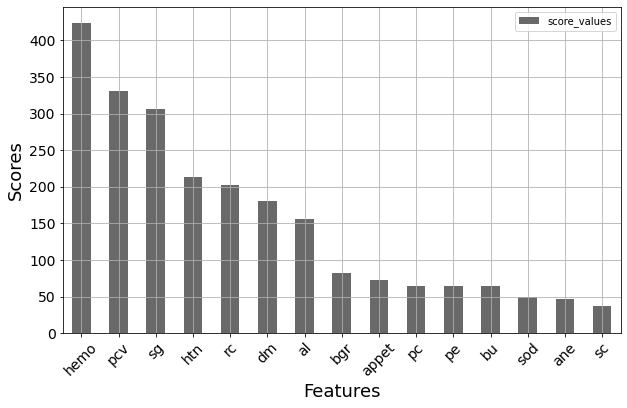

In [ ]:
#Take top 15 features
fit_features = SelectKBest(score_func = f_classif)
fit_features.fit(X, y)
score_df = pd.DataFrame(fit_features.scores_, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns=['score_values'])
best_15 = best_15.set_index('features')
best_15.plot(kind='bar',color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_f_classif = X.iloc[:,[7,8,11,18,10,19,12,2,21,15,22,3,5,23,4]]
X_f_classif.shape

(400, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_f_classif, y, test_size=0.33, random_state=42)
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 50))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
print(CV_rf.score(X_train, y_train))
print(CV_rf.score(X_test, y_test))


#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
print(CV_neigh.score(X_train, y_train))
print(CV_neigh.score(X_test, y_test))


#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
print(CV_dcsn_tree.score(X_train, y_train))
print(CV_dcsn_tree.score(X_test, y_test))


#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)), 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
print(CV_svm.score(X_train, y_train))
print(CV_svm.score(X_test, y_test))



nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.score(X_train, y_train))
print(gs_NB.score(X_test, y_test))
print(gs_NB.best_params_)



#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
print(CV_lr.score(X_train, y_train))
print(CV_lr.score(X_test, y_test))


#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
print(CV_sgd.score(X_train, y_train))
print(CV_sgd.score(X_test, y_test))


#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
print(CV_X_tree.score(X_train, y_train))
print(CV_X_tree.score(X_test, y_test))

RandomForestClassifier(random_state=3)
1.0
1.0
KNeighborsClassifier(n_neighbors=1)
1.0
0.9924242424242424
DecisionTreeClassifier(random_state=5)
1.0
1.0
SVC(kernel='linear', probability=True, random_state=0)
0.996268656716418
1.0
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.01)
0.9664179104477612
0.9772727272727273
{'var_smoothing': 0.01}
LogisticRegression(random_state=0)
0.9925373134328358
1.0
SGDClassifier(random_state=3)
1.0
1.0
ExtraTreesClassifier(random_state=25)
1.0
1.0


In [ ]:
#classification Reports
print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))

RF 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

KNN 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        48
         1.0       1.00      0.99      0.99        84

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132

DT 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

SVM

## Stacking Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_f_classif, y, test_size=0.33, random_state=42)

In [ ]:
# individual performance
print(RandomForestClassifier(random_state=3).fit(X_train, y_train).score(X_test, y_test))
print(KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train).score(X_test, y_test))
print(GaussianNB(var_smoothing=0.01).fit(X_train, y_train).score(X_test, y_test))
print( SGDClassifier(random_state=3).fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(SVC(kernel='linear', probability=True, random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(DecisionTreeClassifier(random_state=5).fit(X_train, y_train).score(X_test, y_test))
print(ExtraTreesClassifier(random_state=25).fit(X_train, y_train).score(X_test, y_test))

1.0
0.9924242424242424
0.9772727272727273
1.0
1.0
1.0
1.0
1.0


In [ ]:
# plt.plot(list(cross_val_score(GaussianNB(var_smoothing=0.01), X_f_classif, y, cv=50)), marker = 'o')

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
    # ('rf', RandomForestClassifier(random_state=3)),
    ('neigh', KNeighborsClassifier(n_neighbors=1)),
    ('gnb', GaussianNB(var_smoothing= 0.01)),
    # ('sgd', SGDClassifier(random_state=3)),
    # ('lr', LogisticRegression(random_state=0)),
    # ('svm', SVC(kernel='linear', probability=True, random_state=0)),
    # ('dt', DecisionTreeClassifier(random_state=5)),
    # ('ExtraTrees', ExtraTreesClassifier(random_state=25))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

1.0

In [ ]:
y_predicted = clf.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using  KNN

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using  GNB

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing= 0.01))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=GaussianNB(var_smoothing=0.01))
1.0
1.0


In [ ]:
# print(CV_xgb.cv_results_)

In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing= 0.01), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [ ]:
from sklearn.model_selection import cross_val_score
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing= 0.01), random_state=4)
print(cross_val_score(clf_xgb, X_f_classif, y, cv=10))

[0.975 1.    1.    0.975 1.    1.    0.975 0.975 0.975 1.   ]


##Feature Selection Using ExtraTrees

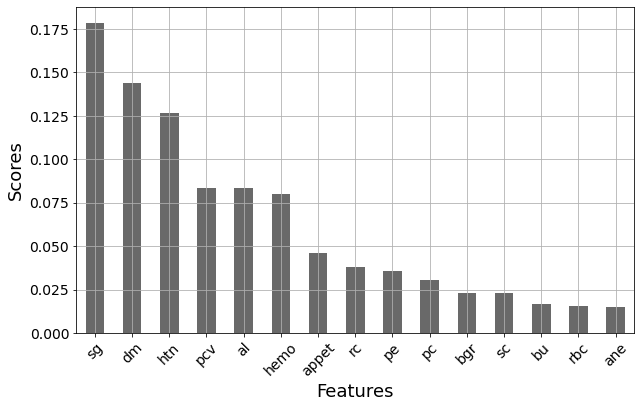

In [ ]:
f_importance_model = ExtraTreesClassifier(random_state=42).fit(X, y)
importances = f_importance_model.feature_importances_
clmn_names = X.columns
importances = pd.Series(importances, index=clmn_names)
importances.nlargest(15).plot(kind='bar', color='#696969', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.ylabel("Scores", fontsize=18)
plt.grid()

In [ ]:
X_Extra_tree = X.loc[:,['ane','rbc','bu','sc','bgr','pc','pe','rc','appet','hemo','al','pcv','htn','dm','sg']]
X_Extra_tree.shape

(400, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Extra_tree, y, test_size=0.33, random_state=42)
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 50))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
print(CV_rf.score(X_train, y_train))
print(CV_rf.score(X_test, y_test))


#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
print(CV_neigh.score(X_train, y_train))
print(CV_neigh.score(X_test, y_test))


#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
print(CV_dcsn_tree.score(X_train, y_train))
print(CV_dcsn_tree.score(X_test, y_test))


#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)), 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
print(CV_svm.score(X_train, y_train))
print(CV_svm.score(X_test, y_test))



nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.score(X_train, y_train))
print(gs_NB.score(X_test, y_test))
print(gs_NB.best_params_)



#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
print(CV_lr.score(X_train, y_train))
print(CV_lr.score(X_test, y_test))


#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
print(CV_sgd.score(X_train, y_train))
print(CV_sgd.score(X_test, y_test))


#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
print(CV_X_tree.score(X_train, y_train))
print(CV_X_tree.score(X_test, y_test))

RandomForestClassifier(random_state=6)
1.0
1.0
KNeighborsClassifier(n_neighbors=1)
1.0
0.9924242424242424
DecisionTreeClassifier(random_state=3)
1.0
1.0
SVC(kernel='poly', probability=True, random_state=0)
0.9850746268656716
0.9924242424242424
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.01)
0.9664179104477612
0.9772727272727273
{'var_smoothing': 0.01}
LogisticRegression(random_state=0)
0.9888059701492538
1.0
SGDClassifier(random_state=32)
0.9925373134328358
1.0
ExtraTreesClassifier(random_state=16)
1.0
1.0


In [ ]:
print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))

RF 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

KNN 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        48
         1.0       1.00      0.99      0.99        84

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132

DT 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Extra_tree, y, test_size=0.33, random_state=42)

In [ ]:
# individual performance
print(RandomForestClassifier(random_state=6).fit(X_train, y_train).score(X_test, y_test))
print(KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train).score(X_test, y_test))
print(GaussianNB(var_smoothing=0.01).fit(X_train, y_train).score(X_test, y_test))
print(SGDClassifier(random_state=32).fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(SVC(kernel='poly', probability=True, random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(DecisionTreeClassifier(random_state=3).fit(X_train, y_train).score(X_test, y_test))
print(ExtraTreesClassifier(random_state=16).fit(X_train, y_train).score(X_test, y_test))

1.0
0.9924242424242424
0.9772727272727273
1.0
1.0
0.9924242424242424
1.0
1.0


##Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
    # ('rf', RandomForestClassifier(random_state=6)),
    ('neigh', KNeighborsClassifier(n_neighbors=1)),
    ('gnb', GaussianNB(var_smoothing= 0.01)),
    # ('sgd', SGDClassifier(random_state=32)),
    # ('lr', LogisticRegression(random_state=0)),
    ('svm', SVC(kernel='poly', probability=True, random_state=0)),
    # ('dt', DecisionTreeClassifier(random_state=3)),
    # ('ExtraTrees', ExtraTreesClassifier(random_state=16))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

1.0

In [ ]:
y_predicted = clf.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using KNN

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using GNB

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing= 0.01))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=GaussianNB(var_smoothing=0.01))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing= 0.01), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using SVM

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=SVC(kernel='poly', probability=True, random_state=0))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=SVC(kernel='poly', probability=True,
                                 random_state=0))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=SVC(kernel='poly', probability=True, random_state=0), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



##Feature Importance Using xgboost

[11:08:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


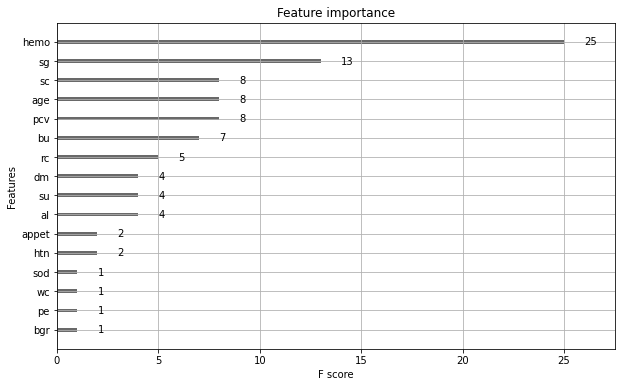

In [ ]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(X, y)

# Create the parameter dictionary: params
params = {"objective":"reg:linear", "max_depth": 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg, color='#696969')
plt.show()

In [ ]:
X_xgboost = X.loc[:,['hemo','sg','sc','age','pcv','bu','rc','dm','su','al','appet','htn','sod','wc','pe']]
X_xgboost.shape

(400, 15)

##Grid Search

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_xgboost, y, test_size=0.33, random_state=42)
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 50))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
print(CV_rf.score(X_train, y_train))
print(CV_rf.score(X_test, y_test))


#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
print(CV_neigh.score(X_train, y_train))
print(CV_neigh.score(X_test, y_test))


#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
print(CV_dcsn_tree.score(X_train, y_train))
print(CV_dcsn_tree.score(X_test, y_test))


#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)), 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
print(CV_svm.score(X_train, y_train))
print(CV_svm.score(X_test, y_test))



nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.score(X_train, y_train))
print(gs_NB.score(X_test, y_test))
print(gs_NB.best_params_)



#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
print(CV_lr.score(X_train, y_train))
print(CV_lr.score(X_test, y_test))


#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
print(CV_sgd.score(X_train, y_train))
print(CV_sgd.score(X_test, y_test))


#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
print(CV_X_tree.score(X_train, y_train))
print(CV_X_tree.score(X_test, y_test))

RandomForestClassifier(random_state=48)
1.0
1.0
KNeighborsClassifier(n_neighbors=1)
1.0
0.9924242424242424
DecisionTreeClassifier(random_state=0)
1.0
1.0
SVC(kernel='poly', probability=True, random_state=0)
0.9925373134328358
0.9924242424242424
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.012328467394420659)
0.9626865671641791
0.9772727272727273
{'var_smoothing': 0.012328467394420659}
LogisticRegression(random_state=0)
0.9925373134328358
1.0
SGDClassifier(random_state=20)
1.0
1.0
ExtraTreesClassifier(random_state=5)
1.0
0.9924242424242424


In [ ]:
print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))

RF 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

KNN 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        48
         1.0       1.00      0.99      0.99        84

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132

DT 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

SVM

#Stacking Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_xgboost, y, test_size=0.33, random_state=42)

In [ ]:
# individual performance
print(RandomForestClassifier(random_state=48).fit(X_train, y_train).score(X_test, y_test))
print(KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train).score(X_test, y_test))
print(GaussianNB(var_smoothing=0.012328467394420659).fit(X_train, y_train).score(X_test, y_test))
print(SGDClassifier(random_state=20).fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(SVC(kernel='poly', probability=True, random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(DecisionTreeClassifier(random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(ExtraTreesClassifier(random_state=5).fit(X_train, y_train).score(X_test, y_test))

1.0
0.9924242424242424
0.9772727272727273
1.0
1.0
0.9924242424242424
1.0
0.9924242424242424


In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
    # ('rf', RandomForestClassifier(random_state=48)),
    ('neigh', KNeighborsClassifier(n_neighbors=1)),
    ('gnb', GaussianNB(var_smoothing= 0.012328467394420659)),
    # ('sgd', SGDClassifier(random_state=20)),
    # ('lr', LogisticRegression(random_state=0)),
    ('svm', SVC(kernel='poly', probability=True, random_state=0)),
    # ('dt', DecisionTreeClassifier(random_state=0)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=5))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

0.9924242424242424

In [ ]:
y_predicted = clf.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        48
         1.0       1.00      0.99      0.99        84

    accuracy                           0.99       132
   macro avg       0.99      0.99      0.99       132
weighted avg       0.99      0.99      0.99       132



###XGB Using KNN

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using GNB

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing= 0.012328467394420659))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=GaussianNB(var_smoothing=0.012328467394420659))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing= 0.012328467394420659), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using SVM

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=SVC(kernel='poly', probability=True, random_state=0))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=SVC(kernel='poly', probability=True,
                                 random_state=0))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=SVC(kernel='poly', probability=True, random_state=0), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using XT

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=ExtraTreesClassifier(random_state=5))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=ExtraTreesClassifier(random_state=5))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=ExtraTreesClassifier(random_state=5), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using Stacking Classifier

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=clf)
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=StackingClassifier(estimators=[('neigh',
                                                             KNeighborsClassifier(n_neighbors=1)),
                                                            ('gnb',
                                                             GaussianNB(var_smoothing=0.012328467394420659)),
                                                            ('svm',
                                                             SVC(kernel='poly',
                                                                 probability=True,
                                                                 random_state=0)),
                                                            ('ExtraTrees',
                                                             ExtraTreesClassifier(random_state=5))],
                                                final_estimator=LogisticRegression()))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=clf, random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



##Feature Importance Using RF, Based on MDI

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# forest = RandomForestClassifier(random_state=0)
# forest.fit(X_train, y_train)

# start_time = time.time()
# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
# elapsed_time = time.time() - start_time

# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# feature_names = list(X.columns)
# forest_importances = pd.Series(importances, index=feature_names)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

Elapsed time to compute the importances: 0.016 seconds


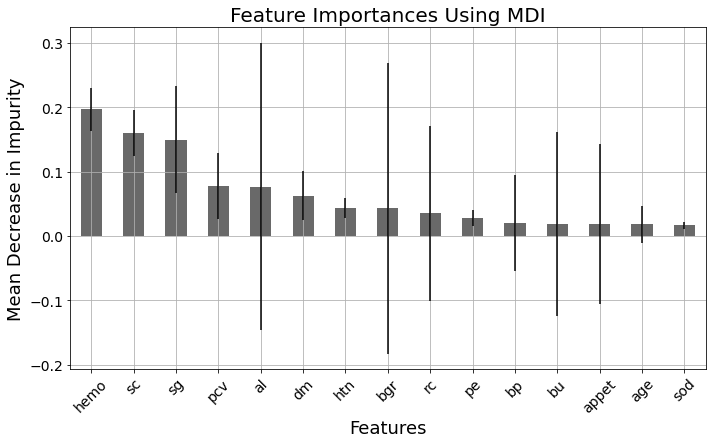

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)[:15]
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

score_df = pd.DataFrame(importances, columns=['score_values'])
best_15 = pd.concat([pd.DataFrame(X.columns, columns=['features']), score_df], axis=1).nlargest(15, columns='score_values')

feature_names = list(best_15.features)
forest_importances = pd.Series(np.array(best_15.score_values), index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='#696969', fontsize=14)
ax.set_title("Feature Importances Using MDI", fontsize=20)
ax.set_ylabel("Mean Decrease in Impurity", fontsize=18)
fig.tight_layout()
plt.xticks(rotation = 45)
plt.xlabel("Features", fontsize=18)
plt.grid()

In [ ]:
X_rf_mdi = X[['hemo', 'sc', 'sg', 'pcv', 'al', 'dm', 'htn', 'bgr', 'rc', 'pe', 'bp', 'bu', 'appet', 'age', 'sod']]
X_rf_mdi.shape

(400, 15)

##Grid Search

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_mdi, y, test_size=0.33, random_state=42)
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 50))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
print(CV_rf.score(X_train, y_train))
print(CV_rf.score(X_test, y_test))


#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
print(CV_neigh.score(X_train, y_train))
print(CV_neigh.score(X_test, y_test))


#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
print(CV_dcsn_tree.score(X_train, y_train))
print(CV_dcsn_tree.score(X_test, y_test))


#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)), 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
print(CV_svm.score(X_train, y_train))
print(CV_svm.score(X_test, y_test))



nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.score(X_train, y_train))
print(gs_NB.score(X_test, y_test))
print(gs_NB.best_params_)



#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
print(CV_lr.score(X_train, y_train))
print(CV_lr.score(X_test, y_test))


#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
print(CV_sgd.score(X_train, y_train))
print(CV_sgd.score(X_test, y_test))


#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
print(CV_X_tree.score(X_train, y_train))
print(CV_X_tree.score(X_test, y_test))

RandomForestClassifier(random_state=32)
1.0
1.0
KNeighborsClassifier(n_neighbors=1)
1.0
0.9772727272727273
DecisionTreeClassifier(random_state=44)
1.0
1.0
SVC(kernel='poly', probability=True, random_state=0)
0.9850746268656716
0.9924242424242424
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.012328467394420659)
0.9701492537313433
0.9772727272727273
{'var_smoothing': 0.012328467394420659}
LogisticRegression(random_state=0)
0.9888059701492538
1.0
SGDClassifier(random_state=11)
0.9850746268656716
1.0
ExtraTreesClassifier(random_state=0)
1.0
1.0


In [ ]:
print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))

RF 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

KNN 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        48
         1.0       1.00      0.96      0.98        84

    accuracy                           0.98       132
   macro avg       0.97      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132

DT 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

SVM

##Stacking Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_mdi, y, test_size=0.33, random_state=42)

In [ ]:
# individual performance
print(RandomForestClassifier(random_state=32).fit(X_train, y_train).score(X_test, y_test))
print(KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train).score(X_test, y_test))
print(GaussianNB(var_smoothing=0.012328467394420659).fit(X_train, y_train).score(X_test, y_test))
print(SGDClassifier(random_state=11).fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(SVC(kernel='poly', probability=True, random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(DecisionTreeClassifier(random_state=44).fit(X_train, y_train).score(X_test, y_test))
print(ExtraTreesClassifier(random_state=0).fit(X_train, y_train).score(X_test, y_test))

1.0
0.9772727272727273
0.9772727272727273
1.0
1.0
0.9924242424242424
1.0
1.0


In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
    # ('rf', RandomForestClassifier(random_state=32)),
    ('neigh', KNeighborsClassifier(n_neighbors=1)),
    ('gnb', GaussianNB(var_smoothing=0.012328467394420659)),
    # ('sgd', SGDClassifier(random_state=11)),
    # ('lr', LogisticRegression(random_state=0)),
    ('svm', SVC(kernel='poly', probability=True, random_state=0)),
    # ('dt', DecisionTreeClassifier(random_state=44)),
    # ('ExtraTrees', ExtraTreesClassifier(random_state=0))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

1.0

In [ ]:
y_predicted = clf.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using KNN

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using GNB

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing=0.012328467394420659))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=GaussianNB(var_smoothing=0.012328467394420659))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing=0.012328467394420659), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using SVM

In [ ]:
param_grid = {
    'random_state' : list(range(51))
}
clf_xgb = xgb.XGBClassifier(base_estimator=SVC(kernel='poly', probability=True, random_state=0))
CV_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid)
CV_xgb.fit(X_train, y_train)
print(CV_xgb.best_params_)
print(CV_xgb.best_estimator_)
print(CV_xgb.score(X_train, y_train))
print(CV_xgb.score(X_test, y_test))

{'random_state': 0}
XGBClassifier(base_estimator=SVC(kernel='poly', probability=True,
                                 random_state=0))
1.0
1.0


In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=SVC(kernel='poly', probability=True, random_state=0), random_state=0)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



##Feature Importance Using RF, Based on Feature Permutation

In [ ]:
from sklearn.inspection import permutation_importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

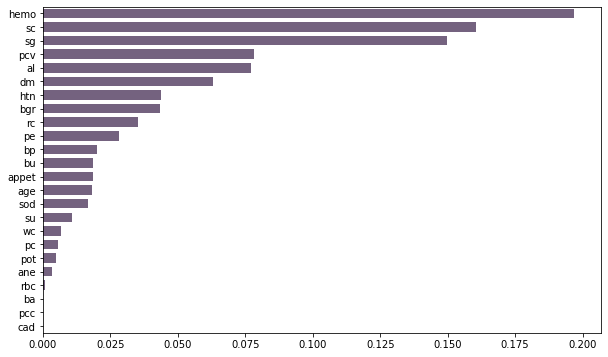

In [ ]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, ax1 = plt.subplots()
ax1.barh(tree_indices,clf.feature_importances_[tree_importance_sorted_idx], height=0.7, color='#74627F')
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(np.array(X.columns)[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
# ax2.boxplot(
#     result.importances[perm_sorted_idx].T,
#     vert=False,
#     labels=np.array(X.columns)[perm_sorted_idx],
# )
# fig.tight_layout()
plt.show()

In [ ]:
X_rf_permutation = X[['hemo','sc','sg','pcv','al','dm','htn','bgr','rc','pe','bp','bu','appet','age','sod']]
X_rf_permutation.shape

(400, 15)

##Grid Search

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_permutation, y, test_size=0.33, random_state=42)
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 50))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
print(CV_rf.score(X_train, y_train))
print(CV_rf.score(X_test, y_test))


#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
print(CV_neigh.score(X_train, y_train))
print(CV_neigh.score(X_test, y_test))


#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
print(CV_dcsn_tree.score(X_train, y_train))
print(CV_dcsn_tree.score(X_test, y_test))


#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)), 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
print(CV_svm.score(X_train, y_train))
print(CV_svm.score(X_test, y_test))



nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.score(X_train, y_train))
print(gs_NB.score(X_test, y_test))
print(gs_NB.best_params_)



#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
print(CV_lr.score(X_train, y_train))
print(CV_lr.score(X_test, y_test))


#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
print(CV_sgd.score(X_train, y_train))
print(CV_sgd.score(X_test, y_test))


#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
print(CV_X_tree.score(X_train, y_train))
print(CV_X_tree.score(X_test, y_test))

RandomForestClassifier(random_state=32)
1.0
1.0
KNeighborsClassifier(n_neighbors=1)
1.0
0.9772727272727273
DecisionTreeClassifier(random_state=44)
1.0
1.0
SVC(kernel='poly', probability=True, random_state=0)
0.9850746268656716
0.9924242424242424
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.012328467394420659)
0.9701492537313433
0.9772727272727273
{'var_smoothing': 0.012328467394420659}
LogisticRegression(random_state=0)
0.9888059701492538
1.0
SGDClassifier(random_state=11)
0.9850746268656716
1.0
ExtraTreesClassifier(random_state=0)
1.0
1.0


In [ ]:
print("RF",'\n',classification_report(y_test, CV_rf.predict(X_test)))
print("KNN",'\n',classification_report(y_test, CV_neigh.predict(X_test)))
print("DT",'\n',classification_report(y_test, CV_dcsn_tree.predict(X_test)))
print("SVM",'\n',classification_report(y_test, CV_svm.predict(X_test)))
print("GNB",'\n',classification_report(y_test, gs_NB.predict(X_test)))
print("LR",'\n',classification_report(y_test, CV_lr.predict(X_test)))
print("SGD",'\n',classification_report(y_test, CV_sgd.predict(X_test)))
print("XT",'\n',classification_report(y_test, CV_X_tree.predict(X_test)))

RF 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

KNN 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        48
         1.0       1.00      0.96      0.98        84

    accuracy                           0.98       132
   macro avg       0.97      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132

DT 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132

SVM

##Stacking Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf_permutation, y, test_size=0.33, random_state=42)

In [ ]:
# individual performance
print(RandomForestClassifier(random_state=32).fit(X_train, y_train).score(X_test, y_test))
print(KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train).score(X_test, y_test))
print(GaussianNB(var_smoothing=0.012328467394420659).fit(X_train, y_train).score(X_test, y_test))
print(SGDClassifier(random_state=11).fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(SVC(kernel='poly', probability=True, random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(DecisionTreeClassifier(random_state=44).fit(X_train, y_train).score(X_test, y_test))
print(ExtraTreesClassifier(random_state=0).fit(X_train, y_train).score(X_test, y_test))

1.0
0.9772727272727273
0.9772727272727273
1.0
1.0
0.9924242424242424
1.0
1.0


In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
    # ('rf', RandomForestClassifier(random_state=32)),
    ('neigh', KNeighborsClassifier(n_neighbors=1)),
    ('gnb', GaussianNB(var_smoothing=0.012328467394420659)),
    # ('sgd', SGDClassifier(random_state=11)),
    # ('lr', LogisticRegression(random_state=0)),
    ('svm', SVC(kernel='poly', probability=True, random_state=0)),
    # ('dt', DecisionTreeClassifier(random_state=44)),
    # ('ExtraTrees', ExtraTreesClassifier(random_state=0))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

1.0

In [ ]:
y_predicted = clf.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [ ]:
#In both cases, RF permutation and MDI, outputs are same as features are same

###XGB Using KNN

In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1), random_state=42)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using GNB

In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=GaussianNB(var_smoothing=0.012328467394420659), random_state=42)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



###XGB Using SVM

In [ ]:
clf_xgb = xgb.XGBClassifier(base_estimator=SVC(kernel='poly', probability=True, random_state=0), random_state=42)
clf_xgb.fit(X_train, y_train)
y_predicted = clf_xgb.predict(X_test)
clf_xgb.score(X_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        48
         1.0       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



##Feature Selection using chi2

In [ ]:
# Due to the presence of negative values in the dataset, chi2 doesn't work. That's why MinMaxScaler is being used as normalization here.
df = pd.read_csv("/content/drive/MyDrive/Thesis/kidney_disease.csv", index_col=0)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
print(df.wc.unique())

# converting sg into float
df.sg[df.sg==1.02] = 3
df.sg[df.sg==1.01] = 1
df.sg[df.sg==1.005] = 0
df.sg[df.sg==1.015] = 2
df.sg[df.sg==1.025] = 4
df['sg'] = df['sg'].astype(float)

# converting wc into float
df.wc[df.wc=="\t?"] = np.nan
df.wc[df.wc=="\t6200"] = 6200
df.wc[df.wc == "\t8400"] = 8400
df['wc'] = df['wc'].astype(float)

#converting pcv into float
df.pcv[df.pcv == "\t?"] = np.nan
df.pcv[df.pcv == "\t43"] = 43
df['pcv'] = df['pcv'].astype(float)

#converting rbc into float
df.rbc[df.rbc == "abnormal"] = 1
df.rbc[df.rbc == "normal"] = 0
df['pcv'] = df['pcv'].astype(float)

#converting pc into float
df.pc[df.pc == "abnormal"] = 1
df.pc[df.pc == "normal"] = 0
df['pc'] = df['pc'].astype(float)

#converting pcc into float
df.pcc[df.pcc == "notpresent"] = 0
df.pcc[df.pcc == "present"] = 1
df['pcc'] = df['pcc'].astype(float)

#converting ba into float
df.ba[df.ba == "notpresent"] = 0
df.ba[df.ba == "present"] = 1
df['ba'] = df['ba'].astype(float)

#converting bgr into float
df['bgr'] = df['bgr'].astype(float)

#converting bu into float
df['bu'] = df['bu'].astype(float)

#converting sc into float
df['sc'] = df['sc'].astype(float)

#converting sod into float
df['sod'] = df['sod'].astype(float)

#converting rc into float
df.rc[df.rc=="\t?"] = np.nan
df['rc'] = df['rc'].astype(float)

#converting pot into float
df['pot'] = df['pot'].astype(float)

#converting hemo into float
df['hemo'] = df['hemo'].astype(float)

#converting htn into float
df.htn[df.htn == "yes"] = 1
df.htn[df.htn == "no"] = 0
df['htn'] = df['htn'].astype(float)

#converting dm into float
df.dm[df.dm == "yes"] = 1
df.dm[df.dm == " yes"] = 1
df.dm[df.dm == "\tyes"] = 1
df.dm[df.dm == "no"] = 0
df.dm[df.dm == "\tno"] = 0
df['dm'] = df['dm'].astype(float)

#converting cad into float
df.cad[df.cad == "yes"] = 1
df.cad[df.cad == "no"] = 0
df.cad[df.cad == "\tno"] = 0
df['cad'] = df['cad'].astype(float)

#converting appet into float
df.appet[df.appet == "good"] = 0
df.appet[df.appet == "poor"] = 1
df['appet'] = df['appet'].astype(float)

#converting pe into float
df.pe[df.pe == "no"] = 0
df.pe[df.pe == "yes"] = 1
df['pe'] = df['pe'].astype(float)

#converting ane into float
df.ane[df.ane == "no"] = 0
df.ane[df.ane == "yes"] = 1
df['ane'] = df['ane'].astype(float)

#converting age,bp, al, su into float if any non float type is present
df['age'] = df['age'].astype(float)
df['bp'] = df['bp'].astype(float)
df['al'] = df['al'].astype(float)
df['su'] = df['su'].astype(float)

#converting classification into right form of string
df.classification[df.classification == "ckd\t"] = 1
df.classification[df.classification == "ckd"] = 1
df.classification[df.classification == "notckd"] = 0
df['classification'] = df['classification'].astype(float)

#separate the numerical and categorical features
df_cat_featuers = df.drop(['age', 'bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','classification'], axis=1)
df_num_featuers = df[['age', 'bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
df_num_featuers.head()


# knn imputation only for continuous columns
df_num_featuers = df_num_featuers.copy(deep=True)
knn_imp = KNNImputer()
df_num_featuers.loc[:, :] = knn_imp.fit_transform(df_num_featuers)
df_num_featuers


#imputation for categorical features using mode
df_cat_featuers.sg.fillna(3.0, inplace=True)
df_cat_featuers.al.fillna(0.0, inplace=True)
df_cat_featuers.su.fillna(0.0, inplace=True)
df_cat_featuers.rbc.fillna(0.0, inplace=True)
df_cat_featuers.pc.fillna(0.0, inplace=True)
df_cat_featuers.pcc.fillna(0.0, inplace=True)
df_cat_featuers.ba.fillna(0.0, inplace=True)
df_cat_featuers.htn.fillna(0.0, inplace=True)
df_cat_featuers.dm.fillna(0.0, inplace=True)
df_cat_featuers.cad.fillna(0.0, inplace=True)
df_cat_featuers.appet.fillna(0.0, inplace=True)
df_cat_featuers.pe.fillna(0.0, inplace=True)
df_cat_featuers.ane.fillna(0.0, inplace=True)



#normalization with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
columns = df_num_featuers.columns.to_list()
df_num_featuers = pd.DataFrame(MMS.fit_transform(df_num_featuers), columns=columns)
df_num_featuers.head()

['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200' '5900' '9300' '9700' '5100' '6600']


<ipython-input-96-f1caaafe8d93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sg[df.sg==1.02] = 3
<ipython-input-96-f1caaafe8d93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sg[df.sg==1.01] = 1
<ipython-input-96-f1caaafe8d93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sg[df.sg==1.005] = 0
<ipython-input-96-f1caaafe8d93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.522727,0.230769,0.211538,0.088575,0.010582,0.847319,0.040449,0.836735,0.777778,0.231405,0.525424
1,0.056818,0.000000,0.194444,0.042362,0.005291,0.838486,0.033708,0.557823,0.644444,0.157025,0.484746
2,0.681818,0.230769,0.856838,0.132221,0.018519,0.815773,0.038202,0.442177,0.488889,0.219008,0.288136
3,0.522727,0.153846,0.202991,0.139923,0.044974,0.671924,0.000000,0.551020,0.511111,0.185950,0.305085
4,0.556818,0.230769,0.179487,0.062901,0.013228,0.844795,0.033258,0.578231,0.577778,0.210744,0.423729


In [ ]:
df = pd.concat([df_num_featuers, df_cat_featuers, df.classification], axis=1)
X = df.drop('classification', axis=1)
y = df.classification

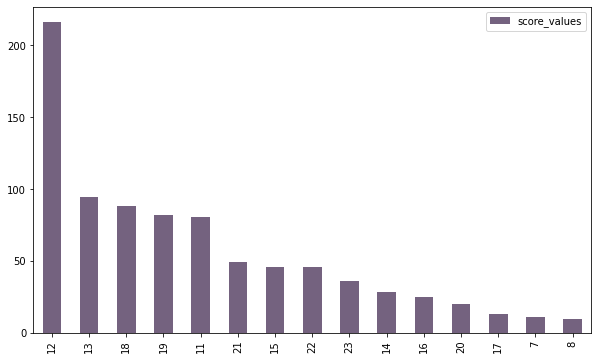

In [ ]:
#Take top 15 features
fit_features = SelectKBest(score_func = chi2)
fit_features.fit(X, y)
score_values = pd.DataFrame(fit_features.scores_, columns=['score_values'])
best_15 = pd.concat([pd.Series(X.columns), score_values], axis=1).nlargest(15, 'score_values')
best_15.plot(kind='bar', color='#74627F')

In [ ]:
X_chi2 = X.iloc[:,[12,13,18,19,11,21,15,22,23,14,16,20,17,7,8]]
X_chi2.shape

(400, 15)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_chi2, y, test_size=0.33, random_state=42)
#RF
rf = RandomForestClassifier()
param_grid = {
    'random_state':list(range(1, 50))
}
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_estimator_)
print(CV_rf.score(X_train, y_train))
print(CV_rf.score(X_test, y_test))


#KNN
neigh = KNeighborsClassifier()
param_grid = {
    'n_neighbors':list(range(1, 16))
}
CV_neigh = GridSearchCV(estimator=neigh, param_grid=param_grid)
CV_neigh.fit(X_train, y_train)
print(CV_neigh.best_estimator_)
print(CV_neigh.score(X_train, y_train))
print(CV_neigh.score(X_test, y_test))


#DT
dcsn_tree = DecisionTreeClassifier()
param_grid = {
              'random_state':list(range(51))
             }
CV_dcsn_tree = GridSearchCV(estimator=dcsn_tree, param_grid=param_grid, cv=5)
CV_dcsn_tree.fit(X_train, y_train)
print(CV_dcsn_tree.best_estimator_)
print(CV_dcsn_tree.score(X_train, y_train))
print(CV_dcsn_tree.score(X_test, y_test))


#SVM
svm = SVC()
param_grid = {
              'random_state':list(range(0,51)), 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'probability':[True, False]
              }
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
CV_svm.fit(X_train, y_train)
print(CV_svm.best_estimator_)
print(CV_svm.score(X_train, y_train))
print(CV_svm.score(X_test, y_test))



nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)
print(gs_NB.best_estimator_)
print(gs_NB.score(X_train, y_train))
print(gs_NB.score(X_test, y_test))
print(gs_NB.best_params_)



#LR
lr = LogisticRegression()
param_grid = {
    'random_state' : list(range(51))
   }
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid)
CV_lr.fit(X_train, y_train)
print(CV_lr.best_estimator_)
print(CV_lr.score(X_train, y_train))
print(CV_lr.score(X_test, y_test))


#SGD
param_grid = {
    'random_state' : list(range(51))
}
sgd = SGDClassifier()
CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
print(CV_sgd.best_estimator_)
print(CV_sgd.score(X_train, y_train))
print(CV_sgd.score(X_test, y_test))


#X_tree
X_tree = ExtraTreesClassifier()
param_grid = {
    'random_state' : list(range(51))
    }
CV_X_tree = GridSearchCV(estimator=X_tree, param_grid=param_grid)
CV_X_tree.fit(X_train, y_train)
print(CV_X_tree.best_estimator_)
print(CV_X_tree.score(X_train, y_train))
print(CV_X_tree.score(X_test, y_test))

RandomForestClassifier(random_state=1)
1.0
1.0
KNeighborsClassifier(n_neighbors=3)
0.9850746268656716
0.9848484848484849
DecisionTreeClassifier(random_state=0)
1.0
1.0
SVC(kernel='linear', probability=True, random_state=0)
0.9813432835820896
0.9848484848484849
Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.012328467394420659)
0.9514925373134329
0.9696969696969697
{'var_smoothing': 0.012328467394420659}
LogisticRegression(random_state=0)
0.9776119402985075
0.9924242424242424
SGDClassifier(random_state=2)
0.9888059701492538
0.9924242424242424
ExtraTreesClassifier(random_state=4)
1.0
0.9924242424242424


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_chi2, y, test_size=0.33, random_state=42)

# individual performance
print(RandomForestClassifier(random_state=1).fit(X_train, y_train).score(X_test, y_test))
print(KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).score(X_test, y_test))
print(GaussianNB(var_smoothing=0.012328467394420659).fit(X_train, y_train).score(X_test, y_test))
print(SGDClassifier(random_state=2).fit(X_train, y_train).score(X_test, y_test))
print(LogisticRegression(random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(SVC(kernel='linear', probability=True, random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(DecisionTreeClassifier(random_state=0).fit(X_train, y_train).score(X_test, y_test))
print(ExtraTreesClassifier(random_state=4).fit(X_train, y_train).score(X_test, y_test))

1.0
0.9848484848484849
0.9696969696969697
0.9924242424242424
0.9924242424242424
0.9848484848484849
1.0
0.9924242424242424


##Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
    # ('rf', RandomForestClassifier(random_state=3)),
    ('neigh', KNeighborsClassifier(n_neighbors=1)),
    ('gnb', GaussianNB(var_smoothing= 0.006579332246575682)),
    ('sgd', SGDClassifier(random_state=39)),
    ('lr', LogisticRegression(random_state=0)),
    ('svm', SVC(kernel='linear', probability=True, random_state=0)),
    # ('dt', DecisionTreeClassifier(random_state=34)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=15))
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train, y_train).score(X_test, y_test)

0.9924242424242424